# Quiz 3

<font size='4'>
    
Class: BIOS-584 <br>
Time: 10-12 on Oct 31 <br>
Location: RRR 102 <br>
Name: Madelyn Carlson <br>

In [68]:
import os
# import numpy as np # this line is optional once you import Quiz3Fun
import pandas as pd
from self_py_fun.Quiz3Fun import *
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import pearsonr

<font size='4'>

You can leave if you finish it early. <br>
Make sure to show the line number for your Jupyter Notebook.<br>
The Quiz is open book and open notes, you can search relevant functions online, but you cannot use any AI tools.

## Q1. Pandas Data Analysis (1')

<font size='4'>

In this question, you are going to replicate part of the results from the research paper (Touponse et al, 2025). <br>
A copy of the published version is attached in the GitHub repository for your convenience. <br>
Section 2.4 may be helpful for you to select proper statistical tests.

In [13]:
ptsd_dir = '{}/data/PTSD dataset.xlsx'.format(os.getcwd())
ptsd_df = pd.read_excel(ptsd_dir, sheet_name=1)
# I want to look at the variables included in this dataset:
# print(ptsd_df.columns.tolist())

,record_id,ptsdpresent_caps,caps_minuspcl,caps_minuspcl_code,caps_intake,pcl5_score_intake,pcl5month_score.baseline,pcl5week_score.completion,pcl5month_score.3_month_follow_up,mdd_code,...,state_code,va_benefits_indicator,wwp_alumni_indicator,army,airforce,marines,navy,coastguard,nationalguard,reserve
0,460,1,-56,1,15,71,75.0,40.0,NaN,0,...,TX,Yes,No,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5942,1,-49,1,23,72,NaN,52.0,29.0,0,...,GA,Yes,No,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,5366,1,-48,1,31,79,62.0,23.0,NaN,1,...,GA,N,N,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3480,1,-47,1,31,78,76.0,72.0,NaN,0,...,GA,Yes,Yes,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1029,1,-46,1,28,74,52.0,29.0,36.0,0,...,GA,Yes,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Q1.1 Descriptive Statistics and Univariate Comparison Stratified by Categorical Variable

<font size='4'>

Let's replicate part of Table 1 in Python. One categorical variable and one continuous variable are selected. <br>
You should show relevant codes to reflect the corresponding outputs.<br>
The variable for agreement group is coded as `caps_minuspcl_code`, you should be able to see the correspondence between levels and labels based on the sample size.<br>

For categorical variables, fill in both frequency and proportion of race variable, coded as `race_code`. <br>
Note that the proportion should be normalized by each column.<br>
For p-value, please refer to this tutorial: https://docs.scipy.org/doc/scipy/tutorial/stats/hypothesis_chi2_contingency.html#hypothesis-chi2-contingency.

| Patient characteristic     | Extensive Over-reporters  (n=83) | Limited Over-reporters  (n=325) | Congruent Reporters (n=75) | P-value |
|----------------------------|----------------------------------|---------------------------------|----------------------------|---------|
| Race, n (%)                |                                  |                                 |                            |         |
| White (1)                  |                                  |                                 |                            |         |
| Black (2)                  |                                  |                                 |                            |         |
| Asian/Pacific Islander (3) |                                  |                                 |                            |         |
| Native American (4)        |                                  |                                 |                            |         |
| Multi-racial (5)           |                                  |                                 |                            |         |
| Missing (6)                |                                  |                                 |                            |         |

In [44]:
# Relevant code to fill in race group in Table 1
# First, I want to check the frequencies for each of these variables
print(ptsd_df['race_code'].value_counts(dropna=False))
print()
print(ptsd_df['caps_minuspcl_code'].value_counts(dropna=False))
print()
race_by_caps = pd.crosstab(ptsd_df['race_code'], ptsd_df['caps_minuspcl_code']) # crosstab
prop_race_by_caps = race_by_caps.div(race_by_caps.sum(axis=0), axis=1) * 100 # create proportions normalized by each column
my_table1 = race_by_caps.astype(str) + " (" + prop_race_by_caps.round(1).astype(str) + "%)"
# chi2_contingency(race_by_caps) # using chi2_contingency to get p value for table 1. Notes: chi2_contingency produces 4 values: the chi-square, the p value, dof, and expected frequencies. I only want p value, so I will specify [1] in the code below
p = chi2_contingency(race_by_caps)[1]
my_table1['p-value'] = ""
my_table1.loc[my_table1.index[0], 'p-value'] = f"{p:.3f}" # I am asking for p-values up to 3 decimal places to match Touponse and colleagues Table 1.
my_table1.columns = [
    'Extensive Over-Reporters (n=83)',
    'Limited Over-Reporters (n=325)',
    'Congruent Reporters (n=75)',
    'P-value']
my_table1.index = [
    'White (1)',
    'Black (2)',
    'Asian/Pacific Islander (3)',
    'Native American (4)',
    'Multi-racial (5)',
    'Missing (6)']
my_table1.index.name = "Patient Characteristics"
# source for Table 1 code: https://pandas.pydata.org/docs/user_guide/style.html
print(my_table1)

race_code
1    270
2    144
6     45
5     11
3     10
4      3
Name: count, dtype: int64

caps_minuspcl_code
2    325
1     83
3     75
Name: count, dtype: int64

                           Extensive Over-Reporters (n=83)  \
Patient Characteristics                                      
White (1)                                       30 (36.1%)   
Black (2)                                       32 (38.6%)   
Asian/Pacific Islander (3)                        3 (3.6%)   
Native American (4)                               1 (1.2%)   
Multi-racial (5)                                  5 (6.0%)   
Missing (6)                                     12 (14.5%)   

                           Limited Over-Reporters (n=325)  \
Patient Characteristics                                     
White (1)                                     190 (58.5%)   
Black (2)                                      97 (29.8%)   
Asian/Pacific Islander (3)                       6 (1.8%)   
Native American (4)               

<font size='4'>

For continouous variable, fill in mean and sd of PHQ-9 score at intake, coded as `phq9_score_intake`. <br>
For mean and std values stratified by a categorical variable, refer to this API page: https://pandas.pydata.org/pandas-docs/version/1.2/reference/api/pandas.core.groupby.GroupBy.mean.html <br>
Use `pd.DataFrame()` to create a new Pandas DataFrame to combine stratified mean and std values, denoted as `phq9_summary_df`. Rename column names as `phq9_mean` and `phq9_std`. <br>
<img src="figures/quiz3_q1.2.png" alt="drawing" width="400"/>

For p-value, please refer to the tutorial: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html#scipy.stats.f_oneway <br>
You may use the conditional slicing (Section 4.9 from week-09-pandas.ipynb)

| Patient characteristic     | Extensive Over-reporters  (n=83) | Limited Over-reporters  (n=325) | Congruent Reporters (n=75) | P-value |
|----------------------------|----------------------------------|---------------------------------|----------------------------|---------|
| Clinical Measures          |                                  |                                 |                            |         |
| PHQ9 score at intake, mean (SD)|                                  |                                 |                            |         |

In [97]:
# Relevant code to fill in PHQ-9 score at intake in Table 1
#phq9_by_caps = ptsd_df.groupby('caps_minuspcl_code')['phq9_score_intake']
#my_second_table1 = pd.DataFrame({'phq9_mean': phq9_by_caps.mean(), 'phq9_std': phq9_by_caps.std()})
#print(my_second_table1)
phq9_by_group = ptsd_df.groupby('caps_minuspcl_code')['phq9_score_intake']
stats = phq9_by_group.agg(['mean', 'std'])
stats_for_table = stats.apply(lambda x: f"{x['mean']:.2f} ({x['std']:.2f})", axis=1)
# produce the p value
groups = [group['phq9_score_intake'].values for name, group in ptsd_df.groupby('caps_minuspcl_code')]
anova_result = f_oneway(*groups)
p_value = f"{anova_result.pvalue:.3f}"
my_second_table1 = pd.DataFrame([stats_for_table.tolist() + [p_value]],
                                columns=list(stats_for_table.index) + ['p-value'],
                                index=["PHQ9 score at intake, mean (SD)"])
print(my_second_table1)

                                            1             2             3  \
PHQ9 score at intake, mean (SD)  17.59 (4.67)  16.60 (5.13)  14.15 (5.71)   

                                p-value  
PHQ9 score at intake, mean (SD)     nan  


### Q1.2 Scatterplots

<font size='4'>

Then, let's replicate part of Figure 1 by creating two scatterplots between CAPS-5 Intake (`caps_intake`) and PCL-5 Intake (`pcl5_score_intake`) (left) as well as between PCL-5 Intake (`pcl5_score_intake`) and PCL-5 Baseline (`pcl5month_score.baseline`) (Right).<br>
You are asked to only create scatterplots, no need to add the linear trends.<br>
You are asked to create a subplot with two plots shown in the same row. <br>
Name x-, y-axes, and titles accordingly. <br>
Report Pearson correlation estimates and their p-values accordingly. You can put relevant information on the title. <br>
Read this API tutorial. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html 

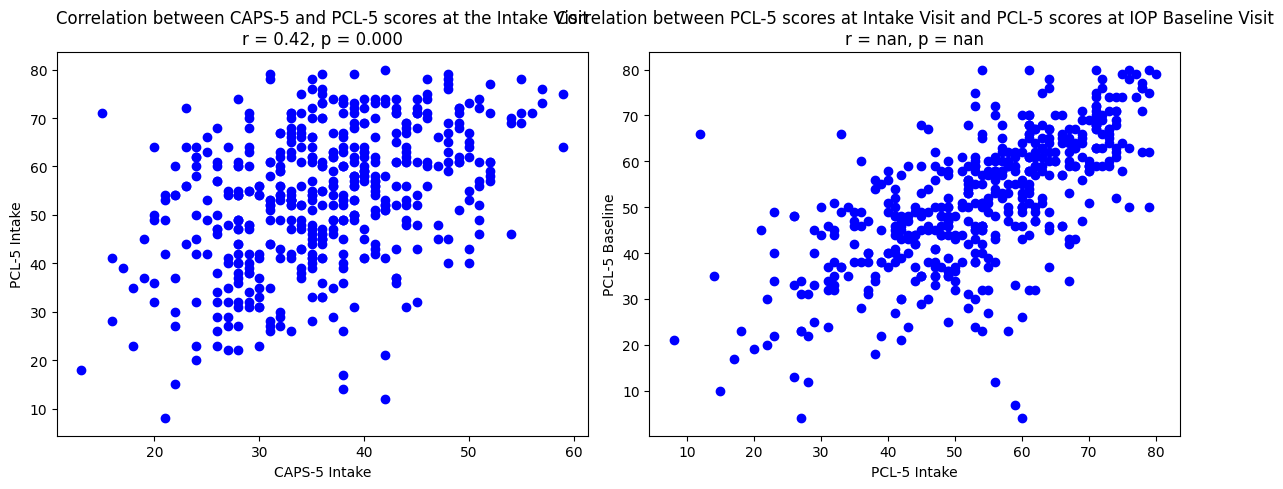

In [74]:
# write your own code below
r1, p1 = pearsonr(ptsd_df['caps_intake'], ptsd_df['pcl5_score_intake'])
r2, p2 = pearsonr(ptsd_df['pcl5_score_intake'], ptsd_df['pcl5month_score.baseline'])
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(ptsd_df['caps_intake'], ptsd_df['pcl5_score_intake'], color='blue')
axes[0].set_xlabel("CAPS-5 Intake")
axes[0].set_ylabel("PCL-5 Intake")
axes[0].set_title(f"Correlation between CAPS-5 and PCL-5 scores at the Intake Visit\nr = {r1:.2f}, p = {p1:.3f}")
axes[1].scatter(ptsd_df['pcl5_score_intake'], ptsd_df['pcl5month_score.baseline'], color='blue')
axes[1].set_xlabel("PCL-5 Intake")
axes[1].set_ylabel("PCL-5 Baseline")
axes[1].set_title(f"Correlation between PCL-5 scores at Intake Visit and PCL-5 scores at IOP Baseline Visit\nr = {r2:.2f}, p = {p2:.3f}")
plt.tight_layout()
plt.show()

### Q1.3 Stratified Error Bars

<font size='4'>
    
Finally, let's replicate the left panel of Figure 2.<br>
Compute the mean and std values of PCL-5 score at baseline (`pcl5month_score.baseline`) and completion of IOP (`pcl5week_score.completion`) stratified by three agreement group (`caps_minuspcl_code`).<br>
Show changes in mean and one-std error bar values between baseline and completion. <br>
For error bar, please refer to the API page: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html. <br>

- Relevant optional parameters for `plt.errorbar()` include `label`, `marker`, `markersize`, `capsize`, and `loc`.
- You can add/minus a small value, i.e., 0.05, to the x-axis array such that three error bars are not overlapped with each other.
- Finally, you should modify the label of your x-axis array if you originally define your x-axis input as a numerical array.
    - Useful function to change the labels include `plt.xticks()`.
- Remember the correspondence as Extensive (1), Limited (2), and Congruent (3). 

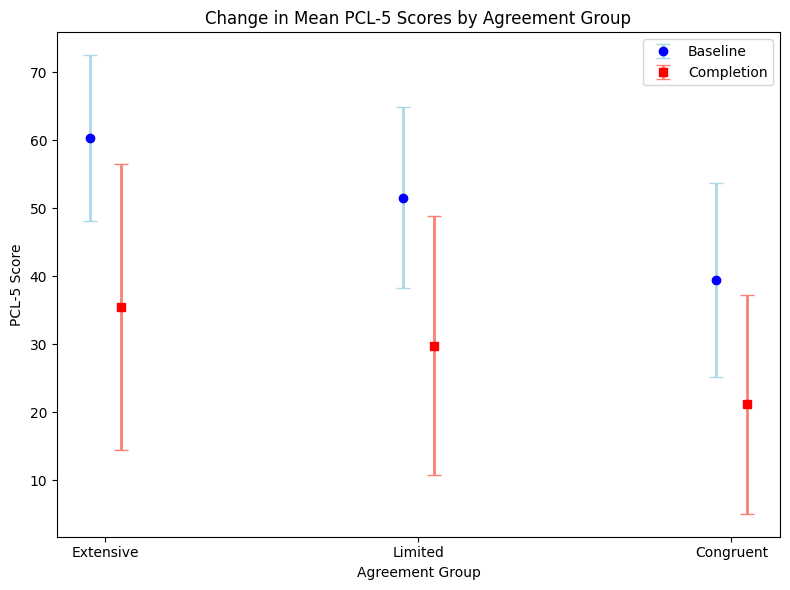

In [91]:
x_arr = np.array(['Baseline', 'Completion'])
x_arr_num = np.array([0, 1])

# write your own code
cap_groups = ptsd_df.groupby("caps_minuspcl_code")
mean_baseline = cap_groups["pcl5month_score.baseline"].mean()
std_baseline = cap_groups["pcl5month_score.baseline"].std()
mean_completion = cap_groups["pcl5week_score.completion"].mean()
std_completion = cap_groups["pcl5week_score.completion"].std()
x = np.array([1, 2, 3])
offset = 0.05
plt.figure(figsize=(8, 6))
plt.errorbar(
    x - offset,
    mean_baseline,
    yerr=std_baseline,
    fmt='o',
    color='blue',
    ecolor='lightblue',
    elinewidth=2,
    capsize=5,
    label='Baseline'
)
plt.errorbar(
    x + offset,
    mean_completion,
    yerr=std_completion,
    fmt='s',
    color='red',
    ecolor='salmon',
    elinewidth=2,
    capsize=5,
    label='Completion'
)
plt.xticks(x, ["Extensive", "Limited", "Congruent"])
plt.xlabel("Agreement Group")
plt.ylabel("PCL-5 Score")
plt.title("Change in Mean PCL-5 Scores by Agreement Group")
plt.legend()
plt.tight_layout()
plt.show()

## Q2. Debugging Example (1')

<font size='4'>

Given a 1-dim signal input $x$ with $T$ data points and $i$ being its index, compute the following function value $D$ such that 
$$D =  \sum_{i=1}^{T-1} \sqrt{1+ (x_i - x_{i+1})^2},$$
where $x_i-x_{i+1}$ is the first-order difference and $i$ ranges from $1$ to $T-1$. <br>
* You have learned the notation $\sqrt{\cdot}$ previously as the operator of square root. <br>
* For $\sum$, if you haven't used it before, it is known as cumulative summation. For example, $\sum_{i=1}^5 a_i = a_1 + a_2 + a_3 + a_4 + a_5$. If $a_i=i$, then the sum is simply $1+2+3+4+5=15$.


I have created a partially written function `compute_D_partial` with a parameter of `input_signal` and returning value `D_val`. However, there are **two typos** such that the outputs of sample input arrays are incorrect. <br>
In particular, for `sample_arr_1`, the incorrect `D` is $1.95$, while the correct `D` should be $5.66$.

1. Find two typos in the original function and comment on the mistake. You can perform debugging task using `Quiz3_main.py`. To make my grading easier, another function `compute_D_partial_for_task_1_only` is attached below. Write a comment right after the line that you think is incorrect to briefly explain the typo.
2. After spotting the typos, write a new function called `compute_D_correct` on `Quiz3Fun.py`. 
3. Call the correct function (`compute_D_correct`) with `sample_arr_2` and print out the correct D value, denoted as `d_val_2`.

In [75]:
# your solution to 1.
def compute_D_partial_for_task_1_only(input_signal):
    r"""
    :param input_signal:
    """
    T_len = len(input_signal)
    signal_diff_one = input_signal[-1] - input_signal[1:] 
    D_val = np.sum(np.sqrt(1+signal_diff_one**2)) / (T_len - 1)
    return D_val

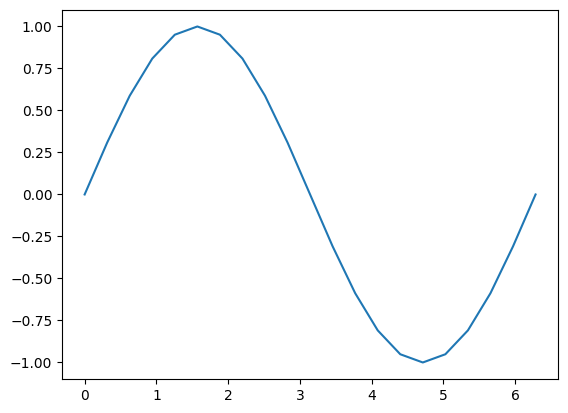

In [76]:
sample_arr_1 = np.array([1,2,3,4,5])
sample_arr_2 = np.sin(np.arange(0, 2.1*np.pi, np.pi/10))

# A figure for sample_arr_2 is plotted for your reference.
plt.plot(np.arange(0, 2.1*np.pi, np.pi/10), sample_arr_2)
plt.show()

In [96]:
# your solution to 3.
# ANSWER: the issues are in the line "signal_diff_one = input_signal[-1] - input_signal[1:]"... 
#... [-1] should have been [1:] and [1:] should have been [:-1]

# print out d_val_1 and d_val_2 using the correct function below.
def compute_D_correct(input_signal):
    r"""
    :param input_signal:
    """
    T_len = len(input_signal)
    signal_diff_one = input_signal[1:] - input_signal[:-1]
    D_val = np.sum(np.sqrt(1 + signal_diff_one**2))
    return D_val

## Final Remarks
<font size='4'>

1. Save all your codes and outputs.
2. Push your changes to your own GitHub repository and submit the link of your Quiz3.ipynb to Canvas.
3. If you have trouble completing the previous step, convert your Jupyter Notebook into a .html output and submit the html output to Canvas.


Finally, Happy Halloween! Remember to take the Ferrero chocolate.